[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 10.29

Analysis of clutch three-point shooting during the 2014/2015 NBA season, where the clutch is defined as the fourth quarter of close games (with a final point differential below 10)\
Topics: Multiple testing, Bonferroni's correction, p value

Author: Carlos Fernandez-Granda\
Data source: https://www.kaggle.com/datasets/pablote/nba-enhanced-stats

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy import stats

font_size = 15
font_size_legend = 15
font_size_ticks = 15

data = pd.read_csv("../data/shot_logs.csv")

data_3s = data[data["PTS_TYPE"] == 3]
# data_3s.head()

In [30]:
minimum_3s = 100

taken = data_3s.groupby(['player_name'])['SHOT_RESULT'].count()
# print(taken.head())
print("Players that took at least " + str(minimum_3s) +" threes:",len(taken[taken >= minimum_3s]))

selected_players = taken[taken >= minimum_3s].keys()
n_players = len(selected_players)

Players that took at least 100 threes: 147


In [31]:
percentages = np.zeros(n_players)

for ind,player in enumerate(selected_players):#enumerate(["stephen curry"]):#enumerate(selected_players):
    print(player)
    player_data = data_3s[data_3s["player_name"] == player]
    shots = player_data["SHOT_RESULT"].values
    attempted = len(shots)
    made = len(shots[shots == "made"])
    percentage = made / attempted
    percentages[ind] = percentage
    print(str(made) + " out of " + str(attempted)
          + " (" + str(np.round(percentage,3)) + ")" )

aaron brooks
89 out of 218 (0.408)
alan anderson
60 out of 174 (0.345)
andre iguodala
52 out of 146 (0.356)
andrew wiggins
34 out of 101 (0.337)
anthony morrow
78 out of 202 (0.386)
arron afflalo
89 out of 259 (0.344)
avery bradley
91 out of 250 (0.364)
ben mclemore
103 out of 286 (0.36)
bojan bogdanovic
52 out of 170 (0.306)
boris diaw
41 out of 128 (0.32)
bradley beal
76 out of 181 (0.42)
brandon jennings
76 out of 211 (0.36)
brandon knight
119 out of 300 (0.397)
brian roberts
49 out of 153 (0.32)
carmelo anthony
60 out of 176 (0.341)
caron butler
50 out of 156 (0.321)
chandler parsons
107 out of 286 (0.374)
channing frye
115 out of 299 (0.385)
charlie villanueva
58 out of 150 (0.387)
chris bosh
63 out of 168 (0.375)
chris copeland
51 out of 162 (0.315)
chris paul
97 out of 256 (0.379)
cj miles
95 out of 298 (0.319)
cj watson
47 out of 124 (0.379)
courtney lee
75 out of 171 (0.439)
damian lillard
143 out of 423 (0.338)
damjan rudez
44 out of 123 (0.358)
danilo gallinai
64 out of 194 

In [32]:
# We separate the season in two halfs
unique_game_ids = np.sort(np.unique(data_3s["GAME_ID"].values))
unique_game_ids[:4]
n_games = len(unique_game_ids)
half = int(n_games/2)
half_id = unique_game_ids[half]

In [33]:
# p value computation based on the first half
# the null hypothesis is that the player's 3-point percentage in the clutch is the same as their season percentage
p_values_1h = np.zeros(n_players)
percentages_1h = np.zeros(n_players)
percentages_clutch_1h = np.zeros(n_players)

for ind,player in enumerate(selected_players):#enumerate(["stephen curry"]):#enumerate(selected_players):
    print(player)
    print(np.round(percentages[ind],3))
    player_data = data_3s[data_3s["player_name"] == player]
    player_data_1h = player_data[player_data["GAME_ID"] < half_id]
    data_fourth_quarter_1h = player_data_1h[player_data_1h.PERIOD == 4]
    clutch_data_1h = data_fourth_quarter_1h[np.abs(data_fourth_quarter_1h.FINAL_MARGIN)<10]
    clutch_shots_1h = clutch_data_1h["SHOT_RESULT"].values
    clutch_attempted_1h = len(clutch_shots_1h)
    clutch_made_1h = len(clutch_shots_1h[clutch_shots_1h == "made"])
    if clutch_attempted_1h > 0:
        percentage_clutch_1h = clutch_made_1h/clutch_attempted_1h
        percentages_clutch_1h[ind] = percentage_clutch_1h
        print("CLUTCH: " + str(clutch_made_1h) + " out of " + str(clutch_attempted_1h)
              + " (" + str(np.round(percentage_clutch_1h,3)) + ")" )
        pmf = binom.pmf(np.arange(clutch_made_1h, clutch_attempted_1h+ 1), clutch_attempted_1h, percentages[ind])
        p_val = np.sum(pmf)
        print("p value: " + str(np.round(p_val,4)))
        p_values_1h[ind] = p_val 
    else:
        percentage_clutch = -1
        p_values_1h[ind] = -1

aaron brooks
0.408
CLUTCH: 13 out of 31 (0.419)
p value: 0.5182
alan anderson
0.345
CLUTCH: 3 out of 12 (0.25)
p value: 0.8399
andre iguodala
0.356
CLUTCH: 2 out of 13 (0.154)
p value: 0.9732
andrew wiggins
0.337
CLUTCH: 0 out of 2 (0.0)
p value: 1.0
anthony morrow
0.386
CLUTCH: 8 out of 20 (0.4)
p value: 0.5335
arron afflalo
0.344
CLUTCH: 5 out of 17 (0.294)
p value: 0.748
avery bradley
0.364
CLUTCH: 7 out of 17 (0.412)
p value: 0.4289
ben mclemore
0.36
CLUTCH: 9 out of 23 (0.391)
p value: 0.4545
bojan bogdanovic
0.306
CLUTCH: 3 out of 9 (0.333)
p value: 0.5528
boris diaw
0.32
CLUTCH: 1 out of 14 (0.071)
p value: 0.9955
bradley beal
0.42
CLUTCH: 3 out of 6 (0.5)
p value: 0.4969
brandon jennings
0.36
CLUTCH: 3 out of 13 (0.231)
p value: 0.9005
brandon knight
0.397
CLUTCH: 8 out of 27 (0.296)
p value: 0.8987
brian roberts
0.32
CLUTCH: 4 out of 14 (0.286)
p value: 0.7039
carmelo anthony
0.341
CLUTCH: 11 out of 30 (0.367)
p value: 0.4502
caron butler
0.321
CLUTCH: 8 out of 13 (0.615)
p va

In [34]:
print("Ranking of clutch players")
sort_inds = p_values_1h.argsort()
top_5 = []
ind_top_5 = []
top_5_counter = 0
for player_ind in sort_inds:
    if p_values_1h[player_ind] > 0: # p value is -1 for players that did not attempt shots in the clutch
        if top_5_counter < 5:
            top_5.append(selected_players[player_ind])
            ind_top_5.append(player_ind)
            top_5_counter += 1
        print(round(p_values_1h[player_ind],3),selected_players[player_ind])

Ranking of clutch players
0.006 robert covington
0.019 nikola mirotic
0.027 caron butler
0.029 mike conley
0.039 kirk hinrich
0.054 marcus morris
0.085 charlie villanueva
0.098 kyle singler
0.102 isaiah thomas
0.114 michael carter-williams
0.127 manu ginobili
0.129 luke babbitt
0.132 patrick patterson
0.137 mike scott
0.156 ryan anderson
0.172 deron williams
0.184 vince carter
0.184 rasual butler
0.187 jose calderon
0.209 steve blake
0.227 devin harris
0.232 donald sloan
0.257 kj mcdaniels
0.264 kyle korver
0.269 kentavious caldwell-pope
0.3 nick young
0.305 jared sullinger
0.336 gerald green
0.343 marcus thornton
0.357 kemba walker
0.365 time hardaway jr
0.373 pablo prigioni
0.392 matt barnes
0.4 marcus smart
0.417 jose juan barea
0.429 avery bradley
0.434 norris cole
0.435 wesley matthews
0.436 luc mbah a moute
0.45 carmelo anthony
0.455 ben mclemore
0.461 hollis thompson
0.477 jason terry
0.496 damian lillard
0.497 bradley beal
0.501 jeff green
0.501 marvin williams
0.507 shawne wil

In [35]:
p_values_2h = np.zeros(n_players)
percentages_2h = np.zeros(n_players)
percentages_clutch_2h = np.zeros(n_players)

for ind,player in enumerate(top_5):#enumerate(["stephen curry"]):#enumerate(selected_players):
    print(player)
    player_data = data_3s[data_3s["player_name"] == player]
    player_data_2h = player_data[player_data["GAME_ID"] >= half_id]
    data_fourth_quarter_2h = player_data_2h[player_data_2h.PERIOD == 4]
    clutch_data_2h = data_fourth_quarter_2h[np.abs(data_fourth_quarter_2h.FINAL_MARGIN)<10]
    clutch_shots_2h = clutch_data_2h["SHOT_RESULT"].values
    clutch_attempted_2h = len(clutch_shots_2h)
    clutch_made_2h = len(clutch_shots_2h[clutch_shots_2h == "made"])
    if clutch_attempted_2h > 0:
        percentage_clutch_2h = clutch_made_2h/clutch_attempted_2h
        percentages_clutch_2h[ind] = percentage_clutch_2h
        print("CLUTCH: " + str(clutch_made_2h) + " out of " + str(clutch_attempted_2h)
              + " (" + str(np.round(percentage_clutch_2h,3)) + ")" )
        pmf = binom.pmf(np.arange(clutch_made_2h, clutch_attempted_2h+ 1), clutch_attempted_2h, percentages[ind_top_5[ind]])
        p_val = np.sum(pmf)
        print("p value: " + str(np.round(p_val,4)))
        p_values_2h[ind] = p_val 
    else:
        percentage_clutch = -1

robert covington
CLUTCH: 7 out of 22 (0.318)
p value: 0.7958
nikola mirotic
CLUTCH: 6 out of 16 (0.375)
p value: 0.4782
caron butler
CLUTCH: 2 out of 8 (0.25)
p value: 0.7831
mike conley
CLUTCH: 8 out of 16 (0.5)
p value: 0.2609
kirk hinrich
CLUTCH: 3 out of 8 (0.375)
p value: 0.4909


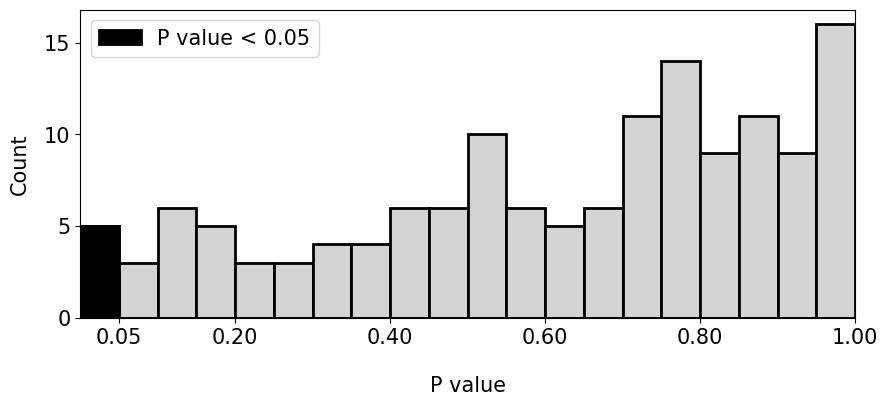

In [36]:
plt.figure(figsize=(10,4))
plt.hist(p_values_1h[p_values_1h>0],bins=np.arange(0,1+0.05,0.05),color = "lightgray", edgecolor="black",linewidth = 2)
plt.hist(p_values_1h[p_values_1h < 0.05],bins=np.arange(0,1+0.05,0.05),color = "black", edgecolor="black",
         linewidth = 2,label="P value < 0.05")
plt.xticks([0.05,0.2,0.4,0.6,0.8,1],fontsize=font_size_ticks) 
plt.yticks([0,5,10,15],fontsize=font_size_ticks)
plt.xlim([0,1])
plt.xlabel(r"P value",fontsize=font_size_ticks,labelpad = 20)
plt.ylabel(r'Count',labelpad = 10,fontsize=font_size_ticks)
plt.legend(fontsize=font_size_legend)